In [37]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from matplotlib.patches import ConnectionPatch
import mplcyberpunk
from bokeh.plotting import figure, show, save
from bokeh.models import ColumnDataSource

In [38]:
%matplotlib inline 

In [39]:
#trying this thing I found on the internet
%who_ls

['ColumnDataSource',
 'ConnectionPatch',
 'cln_di',
 'crimeType',
 'crimes_count_date',
 'date_index',
 'datetime',
 'figure',
 'filtered_df',
 'mplcyberpunk',
 'np',
 'os',
 'pd',
 'plot',
 'plt',
 'save',
 'show',
 'standish_crime',
 'standish_df',
 'style',
 'sys']

In [40]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [41]:
#Error says no such module as ipymlp
# %matplotlib ipympl

In [42]:
#create mplscrime dataframe
standish_crime = os.path.join("standish.csv")
standish_df=pd.read_csv(standish_crime)

In [43]:
date_index = standish_df.drop(standish_df.columns[[0, 2, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18]], axis=1)
date_index.head()

,Case_Number,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense,Latitude,Longitude
0,20-703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,All Other Larceny,44.93595,-93.22609
1,21-101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Theft of Motor Vehicle Parts or Accessories,44.93141,-93.23719
2,19-223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,44.93501,-93.23592
3,20-289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,44.93501,-93.23085
4,21-708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,44.92781,-93.23973


In [44]:
date_index['Reported_Date'] = pd.to_datetime(standish_df.Reported_Date)

date_index.head()


,Case_Number,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense,Latitude,Longitude
0,20-703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,All Other Larceny,44.93595,-93.22609
1,21-101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Theft of Motor Vehicle Parts or Accessories,44.93141,-93.23719
2,19-223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,44.93501,-93.23592
3,20-289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,44.93501,-93.23085
4,21-708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,44.92781,-93.23973


In [45]:
#Convert to dt
standish_df['Occurred_Date'] = pd.to_datetime(standish_df.Occurred_Date, format='%Y-%m-%d %H:%M:%S.%f')
#standish_df['Occurred_Date'] = pd.to_datetime(standish_df.Occurred_Date)
#setting the date to the index
standish_df.index=pd.DatetimeIndex(standish_df.Occurred_Date)
#standish_df.set_index(standish_df.Occurred_Date, drop=True, inplace=True)
#standish_df.drop(standish_df.columns[7], axis=1)

standish_df.head()


,Unnamed: 0,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense_Category,Offense,Problem_Initial,Problem_Final,Address,Precinct,Neighborhood,Latitude,Longitude,Date_Occurred,Time_Occurred,Date_Reported,Time_Reported
Occurred_Date,,,,,,,,,,,,,,,,,,,
2020-07-12 09:30:00+00:00,4,20-703897,MP2020703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,Larceny/Theft Offenses,All Other Larceny,NaN,NaN,0032XX 37TH ST E,3.0,Standish,44.93595,-93.22609,2020-07-12,09:30:00,2020-07-12,11:24:00
2021-05-14 00:00:00+00:00,42,21-101731,MP2021101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Larceny/Theft Offenses,Theft of Motor Vehicle Parts or Accessories,Disturbance (P),Theft - Report Only (P),0039XX 24TH AVE S,3.0,Standish,44.93141,-93.23719,2021-05-14,00:00:00,2021-05-14,10:37:00
2019-07-28 16:47:00+00:00,350,19-223202,MP2019223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,Sex Offenses,Crim Sex Conduct/Report (P),Crim Sex Conduct/Report (P),0037XX 25TH AVE S,3.0,Standish,44.93501,-93.23592,2019-07-28,16:47:00,2019-07-28,20:47:00
2020-11-14 23:00:00+00:00,412,20-289454,MP2020289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,Motor Vehicle Theft,Auto Theft (P),Auto Theft (P),0037XX 29TH AVE S,3.0,Standish,44.93501,-93.23085,2020-11-14,23:00:00,2020-11-14,23:58:00
2021-10-23 03:00:00+00:00,532,21-708610,MP2021708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,Burglary/Breaking & Entering,NaN,NaN,0041XX STANDISH AVE,3.0,Standish,44.92781,-93.23973,2021-10-23,03:00:00,2021-10-23,17:18:00


In [46]:
# clean_df=standish_df.drop(columns=['Date_Reported' , 'Time_Reported' , 'Date_Occurred', 'Time_Occurred', 'Neighborhood'], axis=1)
# clean_df
standish_df.dtypes
# standish_df.head()

Unnamed: 0                           int64
Case_Number                         object
Case_NumberAlt                      object
Reported_Date                       object
Occurred_Date          datetime64[ns, UTC]
NIBRS_Crime_Against                 object
Offense_Category                    object
Offense                             object
Problem_Initial                     object
Problem_Final                       object
Address                             object
Precinct                           float64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
Date_Occurred                       object
Time_Occurred                       object
Date_Reported                       object
Time_Reported                       object
dtype: object

In [47]:
standish_df.dtypes

Unnamed: 0                           int64
Case_Number                         object
Case_NumberAlt                      object
Reported_Date                       object
Occurred_Date          datetime64[ns, UTC]
NIBRS_Crime_Against                 object
Offense_Category                    object
Offense                             object
Problem_Initial                     object
Problem_Final                       object
Address                             object
Precinct                           float64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
Date_Occurred                       object
Time_Occurred                       object
Date_Reported                       object
Time_Reported                       object
dtype: object

In [48]:
standish_df.head()

,Unnamed: 0,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense_Category,Offense,Problem_Initial,Problem_Final,Address,Precinct,Neighborhood,Latitude,Longitude,Date_Occurred,Time_Occurred,Date_Reported,Time_Reported
Occurred_Date,,,,,,,,,,,,,,,,,,,
2020-07-12 09:30:00+00:00,4,20-703897,MP2020703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,Larceny/Theft Offenses,All Other Larceny,NaN,NaN,0032XX 37TH ST E,3.0,Standish,44.93595,-93.22609,2020-07-12,09:30:00,2020-07-12,11:24:00
2021-05-14 00:00:00+00:00,42,21-101731,MP2021101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Larceny/Theft Offenses,Theft of Motor Vehicle Parts or Accessories,Disturbance (P),Theft - Report Only (P),0039XX 24TH AVE S,3.0,Standish,44.93141,-93.23719,2021-05-14,00:00:00,2021-05-14,10:37:00
2019-07-28 16:47:00+00:00,350,19-223202,MP2019223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,Sex Offenses,Crim Sex Conduct/Report (P),Crim Sex Conduct/Report (P),0037XX 25TH AVE S,3.0,Standish,44.93501,-93.23592,2019-07-28,16:47:00,2019-07-28,20:47:00
2020-11-14 23:00:00+00:00,412,20-289454,MP2020289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,Motor Vehicle Theft,Auto Theft (P),Auto Theft (P),0037XX 29TH AVE S,3.0,Standish,44.93501,-93.23085,2020-11-14,23:00:00,2020-11-14,23:58:00
2021-10-23 03:00:00+00:00,532,21-708610,MP2021708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,Burglary/Breaking & Entering,NaN,NaN,0041XX STANDISH AVE,3.0,Standish,44.92781,-93.23973,2021-10-23,03:00:00,2021-10-23,17:18:00


In [49]:
date_index = standish_df.drop(standish_df.columns[[0, 2, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18]], axis=1)
date_index.head()

,Case_Number,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense,Latitude,Longitude
Occurred_Date,,,,,,,
2020-07-12 09:30:00+00:00,20-703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,All Other Larceny,44.93595,-93.22609
2021-05-14 00:00:00+00:00,21-101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Theft of Motor Vehicle Parts or Accessories,44.93141,-93.23719
2019-07-28 16:47:00+00:00,19-223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,44.93501,-93.23592
2020-11-14 23:00:00+00:00,20-289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,44.93501,-93.23085
2021-10-23 03:00:00+00:00,21-708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,44.92781,-93.23973


In [50]:
date_index.sort_values(by='Reported_Date')
print(date_index)


                          Case_Number              Reported_Date  \
Occurred_Date                                                      
2020-07-12 09:30:00+00:00   20-703897  2020-07-12 11:24:00+00:00   
2021-05-14 00:00:00+00:00   21-101731  2021-05-14 10:37:00+00:00   
2019-07-28 16:47:00+00:00   19-223202  2019-07-28 20:47:00+00:00   
2020-11-14 23:00:00+00:00   20-289454  2020-11-14 23:58:00+00:00   
2021-10-23 03:00:00+00:00   21-708610  2021-10-23 17:18:00+00:00   
...                               ...                        ...   
2022-07-02 16:00:00+00:00   22-148795  2022-07-02 23:02:00+00:00   
2021-07-14 00:00:00+00:00   21-705551  2021-07-27 09:37:00+00:00   
2020-09-13 03:53:00+00:00   20-237232  2020-09-13 04:59:00+00:00   
2020-02-20 07:30:00+00:00   20-045860  2020-02-20 08:10:00+00:00   
2021-11-08 01:11:00+00:00   21-257585  2021-11-08 01:11:00+00:00   

                                      Occurred_Date NIBRS_Crime_Against  \
Occurred_Date                           

In [51]:
#attempting to create the same df but with Occurred_date as the index 
cln_di = date_index.set_index(date_index.Occurred_Date, drop=True, inplace=True)
print(cln_di)

None


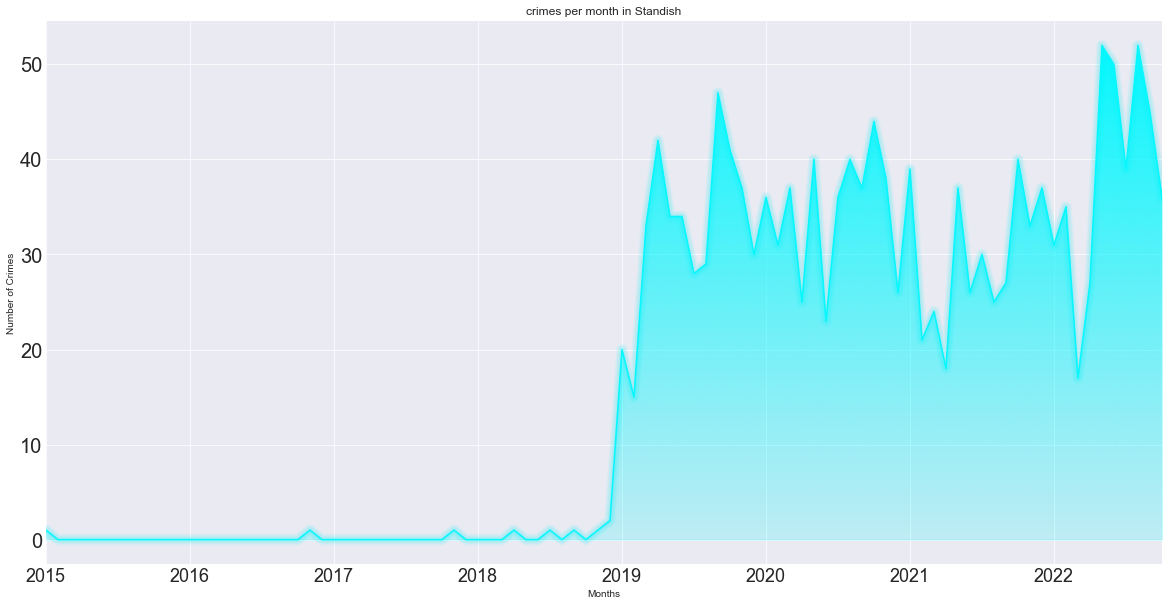

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize=(20,10))
plt.ion()
date_index.resample('M').size().plot(legend=False)
plt.title('crimes per month in Standish')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.style.use('cyberpunk')
mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
plt.show()
plt.savefig("crimes_per_month.png")

In [53]:
date_index.head()


,Case_Number,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense,Latitude,Longitude
Occurred_Date,,,,,,,
2020-07-12 09:30:00+00:00,20-703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,All Other Larceny,44.93595,-93.22609
2021-05-14 00:00:00+00:00,21-101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Theft of Motor Vehicle Parts or Accessories,44.93141,-93.23719
2019-07-28 16:47:00+00:00,19-223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,44.93501,-93.23592
2020-11-14 23:00:00+00:00,20-289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,44.93501,-93.23085
2021-10-23 03:00:00+00:00,21-708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,44.92781,-93.23973


In [54]:
filtered_df=date_index.loc[(date_index['Occurred_Date']>= '2019-01-01')]
filtered_df.head()

,Case_Number,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense,Latitude,Longitude
Occurred_Date,,,,,,,
2020-07-12 09:30:00+00:00,20-703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,All Other Larceny,44.93595,-93.22609
2021-05-14 00:00:00+00:00,21-101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Theft of Motor Vehicle Parts or Accessories,44.93141,-93.23719
2019-07-28 16:47:00+00:00,19-223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,44.93501,-93.23592
2020-11-14 23:00:00+00:00,20-289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,44.93501,-93.23085
2021-10-23 03:00:00+00:00,21-708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,44.92781,-93.23973


In [55]:
filtered_df.dtypes

Case_Number                         object
Reported_Date                       object
Occurred_Date          datetime64[ns, UTC]
NIBRS_Crime_Against                 object
Offense                             object
Latitude                           float64
Longitude                          float64
dtype: object

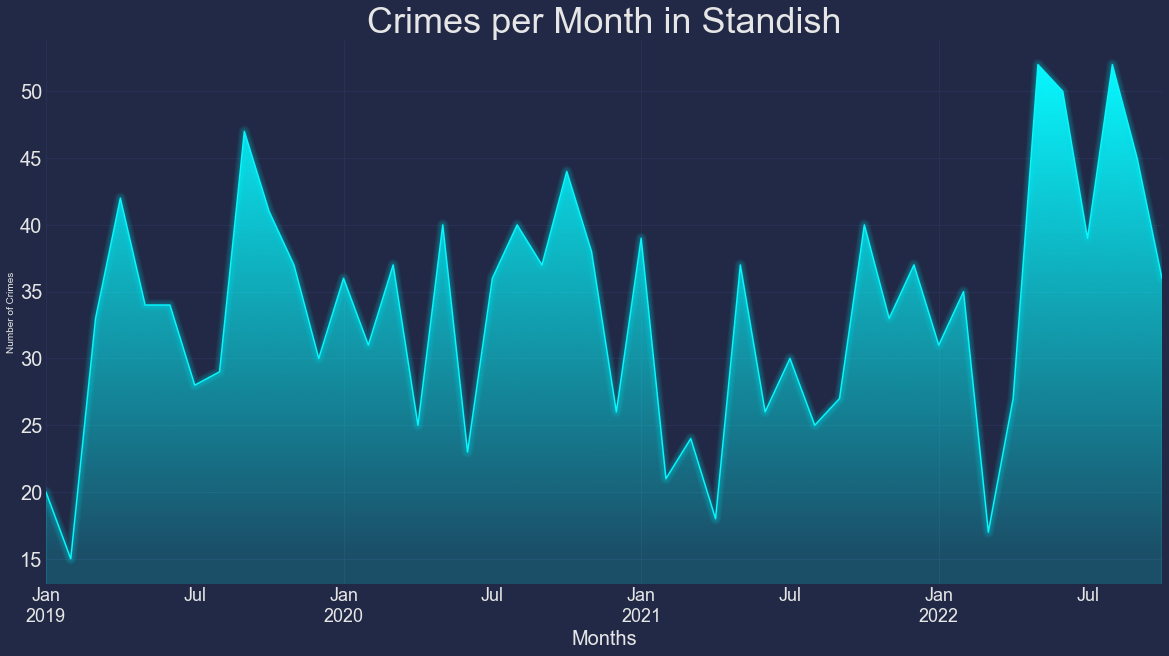

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(20,10))
plt.ion()
filtered_df.resample('M').size().plot(legend=False)
plt.title('Crimes per Month in Standish', fontsize=36)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Number of Crimes')
plt.style.use('cyberpunk')
mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
plt.show()
plt.savefig("cpm_cyberpunk.svg", dpi=200)

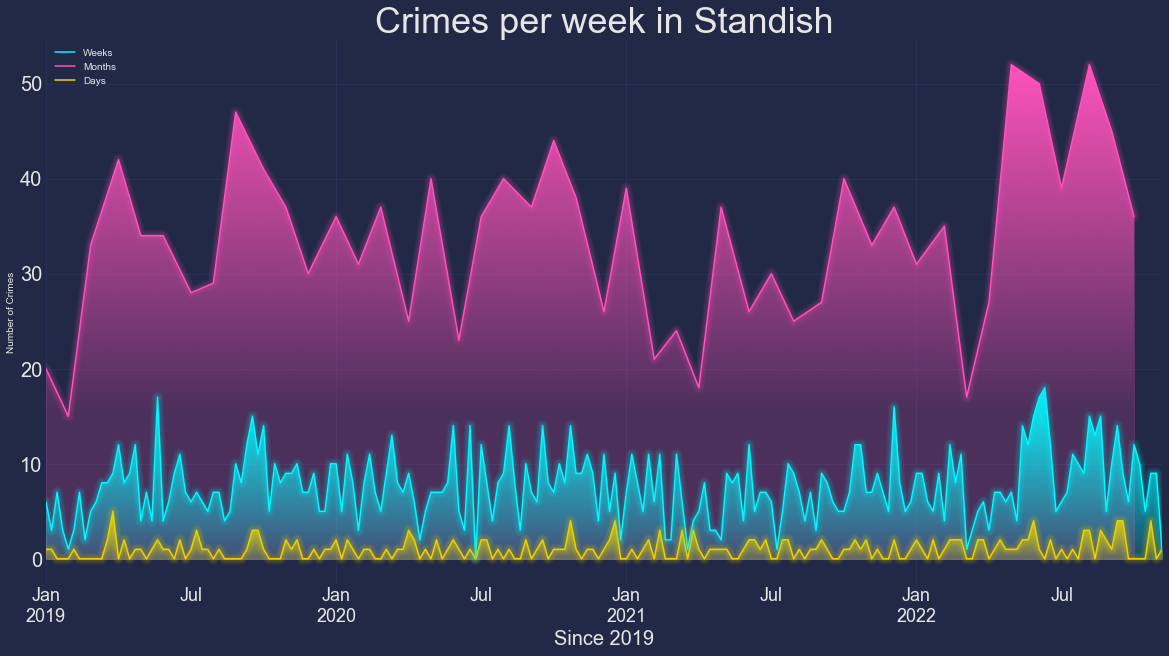

In [57]:
plt.figure(figsize=(20,10))
plt.ion()
filtered_df.resample('W').size().plot(legend=True, label='Weeks')
filtered_df.resample('M').size().plot(legend=True, label='Months')
filtered_df.resample('D').size().plot(legend=True, label='Days')
#filtered_df.resample('H').size().plot(legend=True)
plt.title('Crimes per week in Standish', fontsize=36)
plt.xlabel('Since 2019', fontsize=20)
plt.ylabel('Number of Crimes')
plt.style.use('cyberpunk')
mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
plt.savefig("three_lines_WMD_cyberpunk.png", dpi=200)
plt.show()


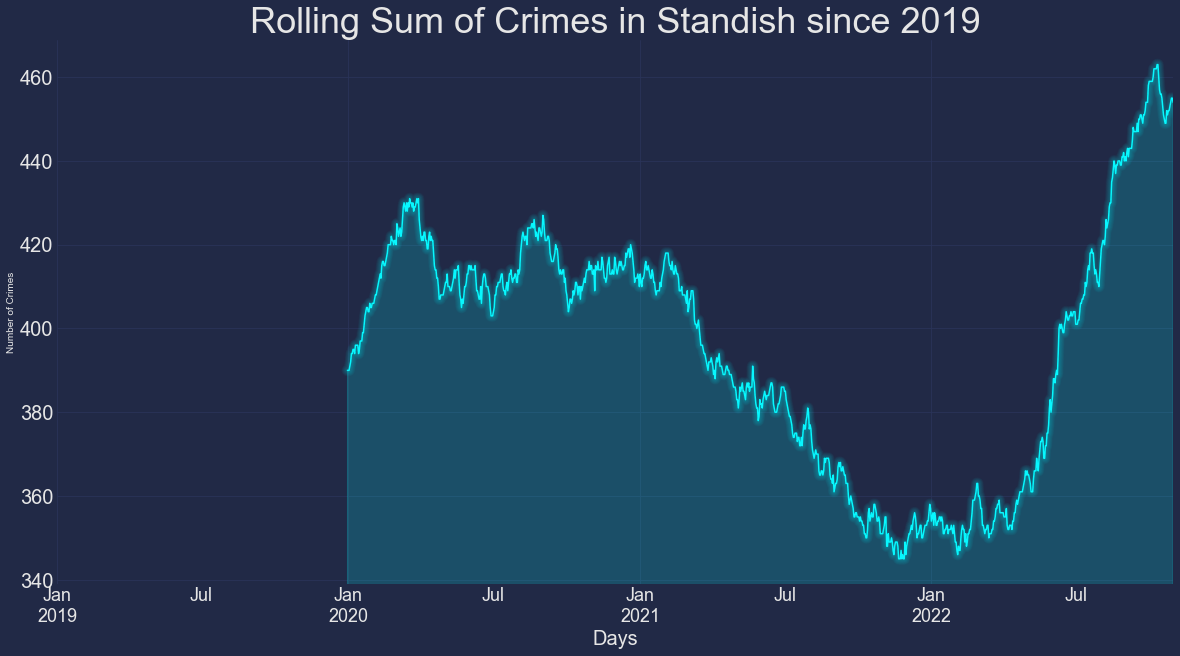

In [58]:
plt.figure(figsize=(20,10))
plt.ion()
filtered_df.resample('D').size().rolling(365).sum().plot(legend=False)
plt.title('Rolling Sum of Crimes in Standish since 2019', fontsize=36)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Number of Crimes')
plt.style.use('cyberpunk')
#mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
#plt.savefig("rolling_cyberpunk.svg", dpi=200)
plt.show()

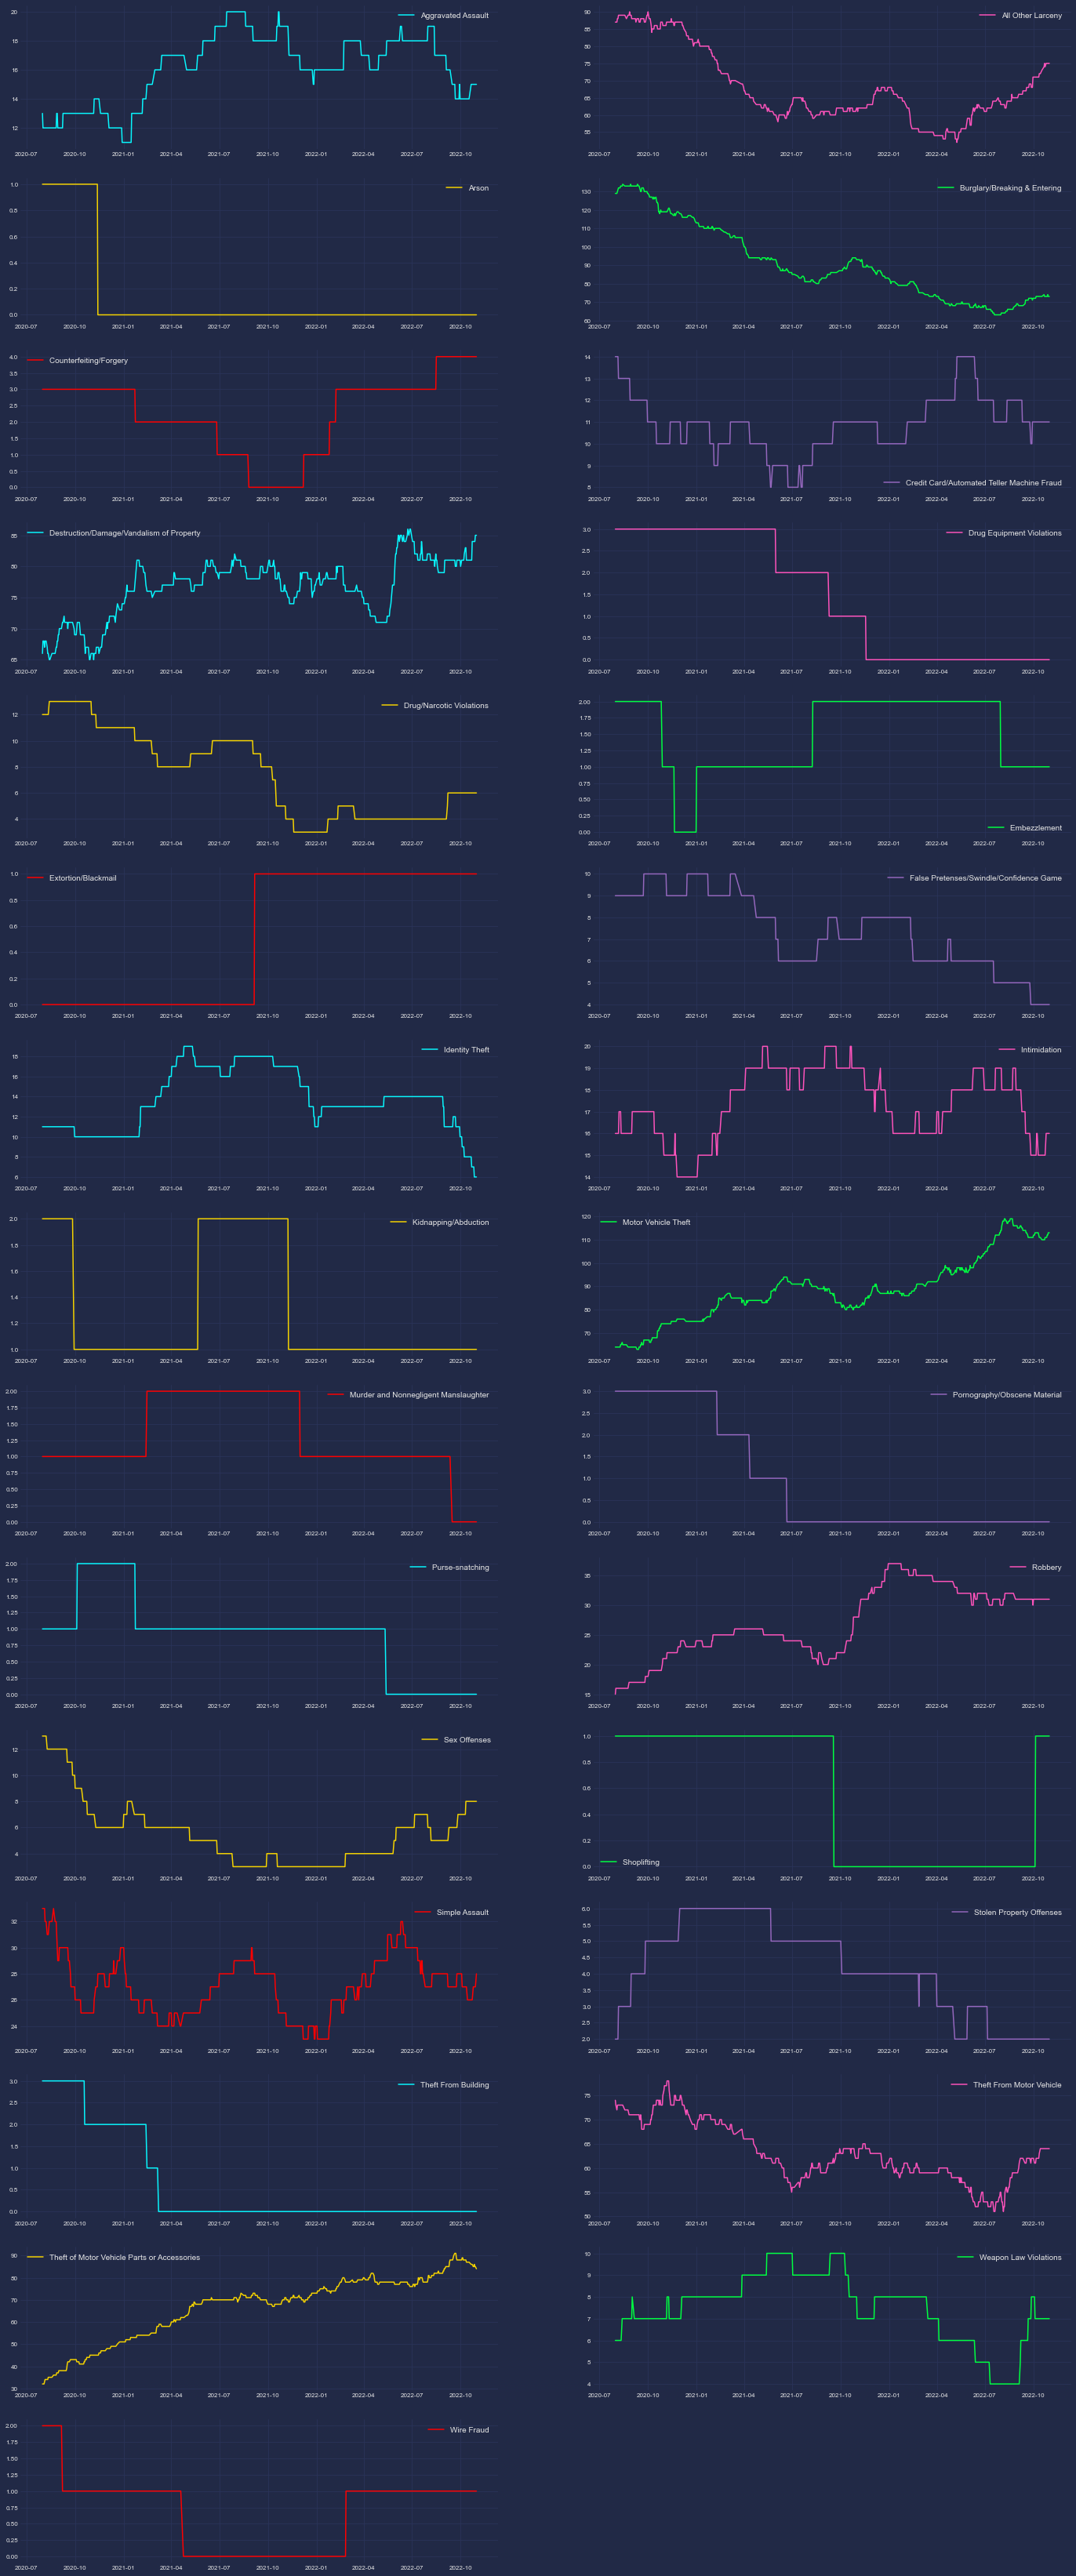

In [59]:
#OK this is sweet and I found the code it's based on here: https://www.kaggle.com/code/yuanjieli/chicago-crime-data-visualization-exercise/notebook
crimes_count_date = filtered_df.pivot_table('Case_Number', aggfunc=np.size, columns='Offense', index=filtered_df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plot = crimes_count_date.rolling(365).sum().plot(figsize=(24, 60), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
plt.style.use(['cyberpunk'])
plt.savefig('types_over_time.png')

attempting to make the graphs interactive with bokeh

In [60]:
# x=filtered_df('Occurred_date')
# y=filtered_df('Case_Number')

In [61]:
# group = filtered_df

In [62]:
# cds=ColumnDataSource(filtered_df)
# cds

In [63]:
# x=cds.Occurred_Date
# x

In [64]:
# p = figure()
# p.circle(x='Occurred_Date', y='Case_Number', source=cds)
# show(p)

Getting back to graphs to keep momentum


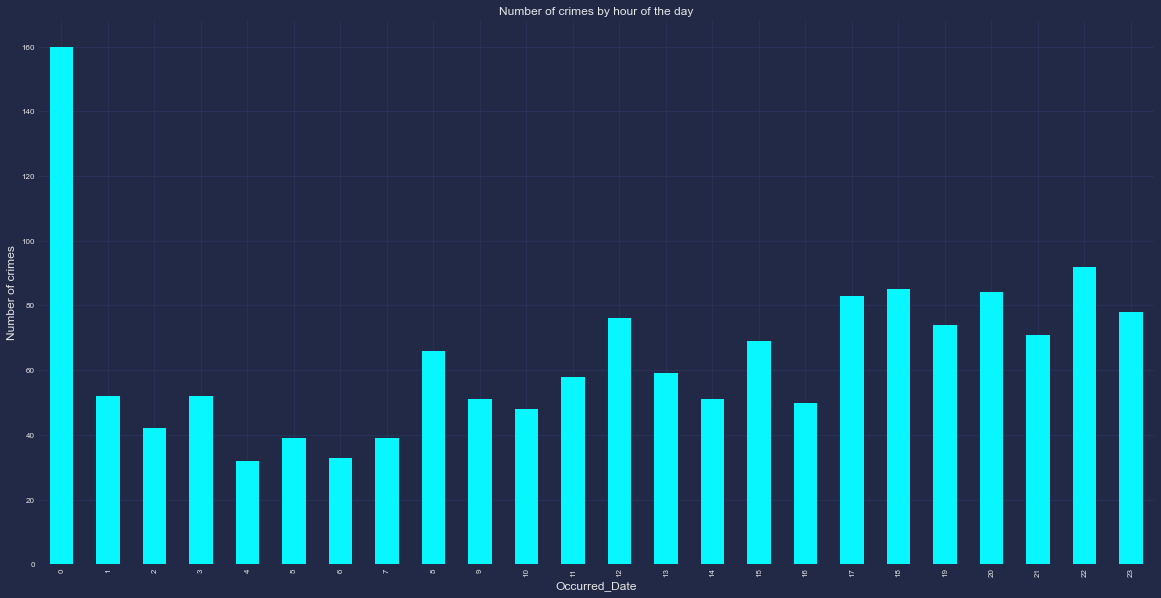

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure(figsize=(20,10))
plt.ylabel('Number of crimes', fontsize=12)
plt.xlabel('Hour of the day', fontsize=12)
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.title('Number of crimes by hour of the day')
filtered_df.groupby([filtered_df.index.hour]).size().plot(kind='bar', style=["cyberpunk"])
plt.show()
plt.savefig('crime_time_standish.png')


In [66]:
filtered_df.head()

,Case_Number,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense,Latitude,Longitude
Occurred_Date,,,,,,,
2020-07-12 09:30:00+00:00,20-703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,All Other Larceny,44.93595,-93.22609
2021-05-14 00:00:00+00:00,21-101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Theft of Motor Vehicle Parts or Accessories,44.93141,-93.23719
2019-07-28 16:47:00+00:00,19-223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,44.93501,-93.23592
2020-11-14 23:00:00+00:00,20-289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,44.93501,-93.23085
2021-10-23 03:00:00+00:00,21-708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,44.92781,-93.23973


In [67]:
#Wow this took like two minutes to run and I have no idea what it's showing me!
crimes_count_date = filtered_df.pivot_table('Occurred_Date', aggfunc=np.size, columns='Case_Number', index=filtered_df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(48, 20), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
plt.style.use(['seaborn-darkgrid'])


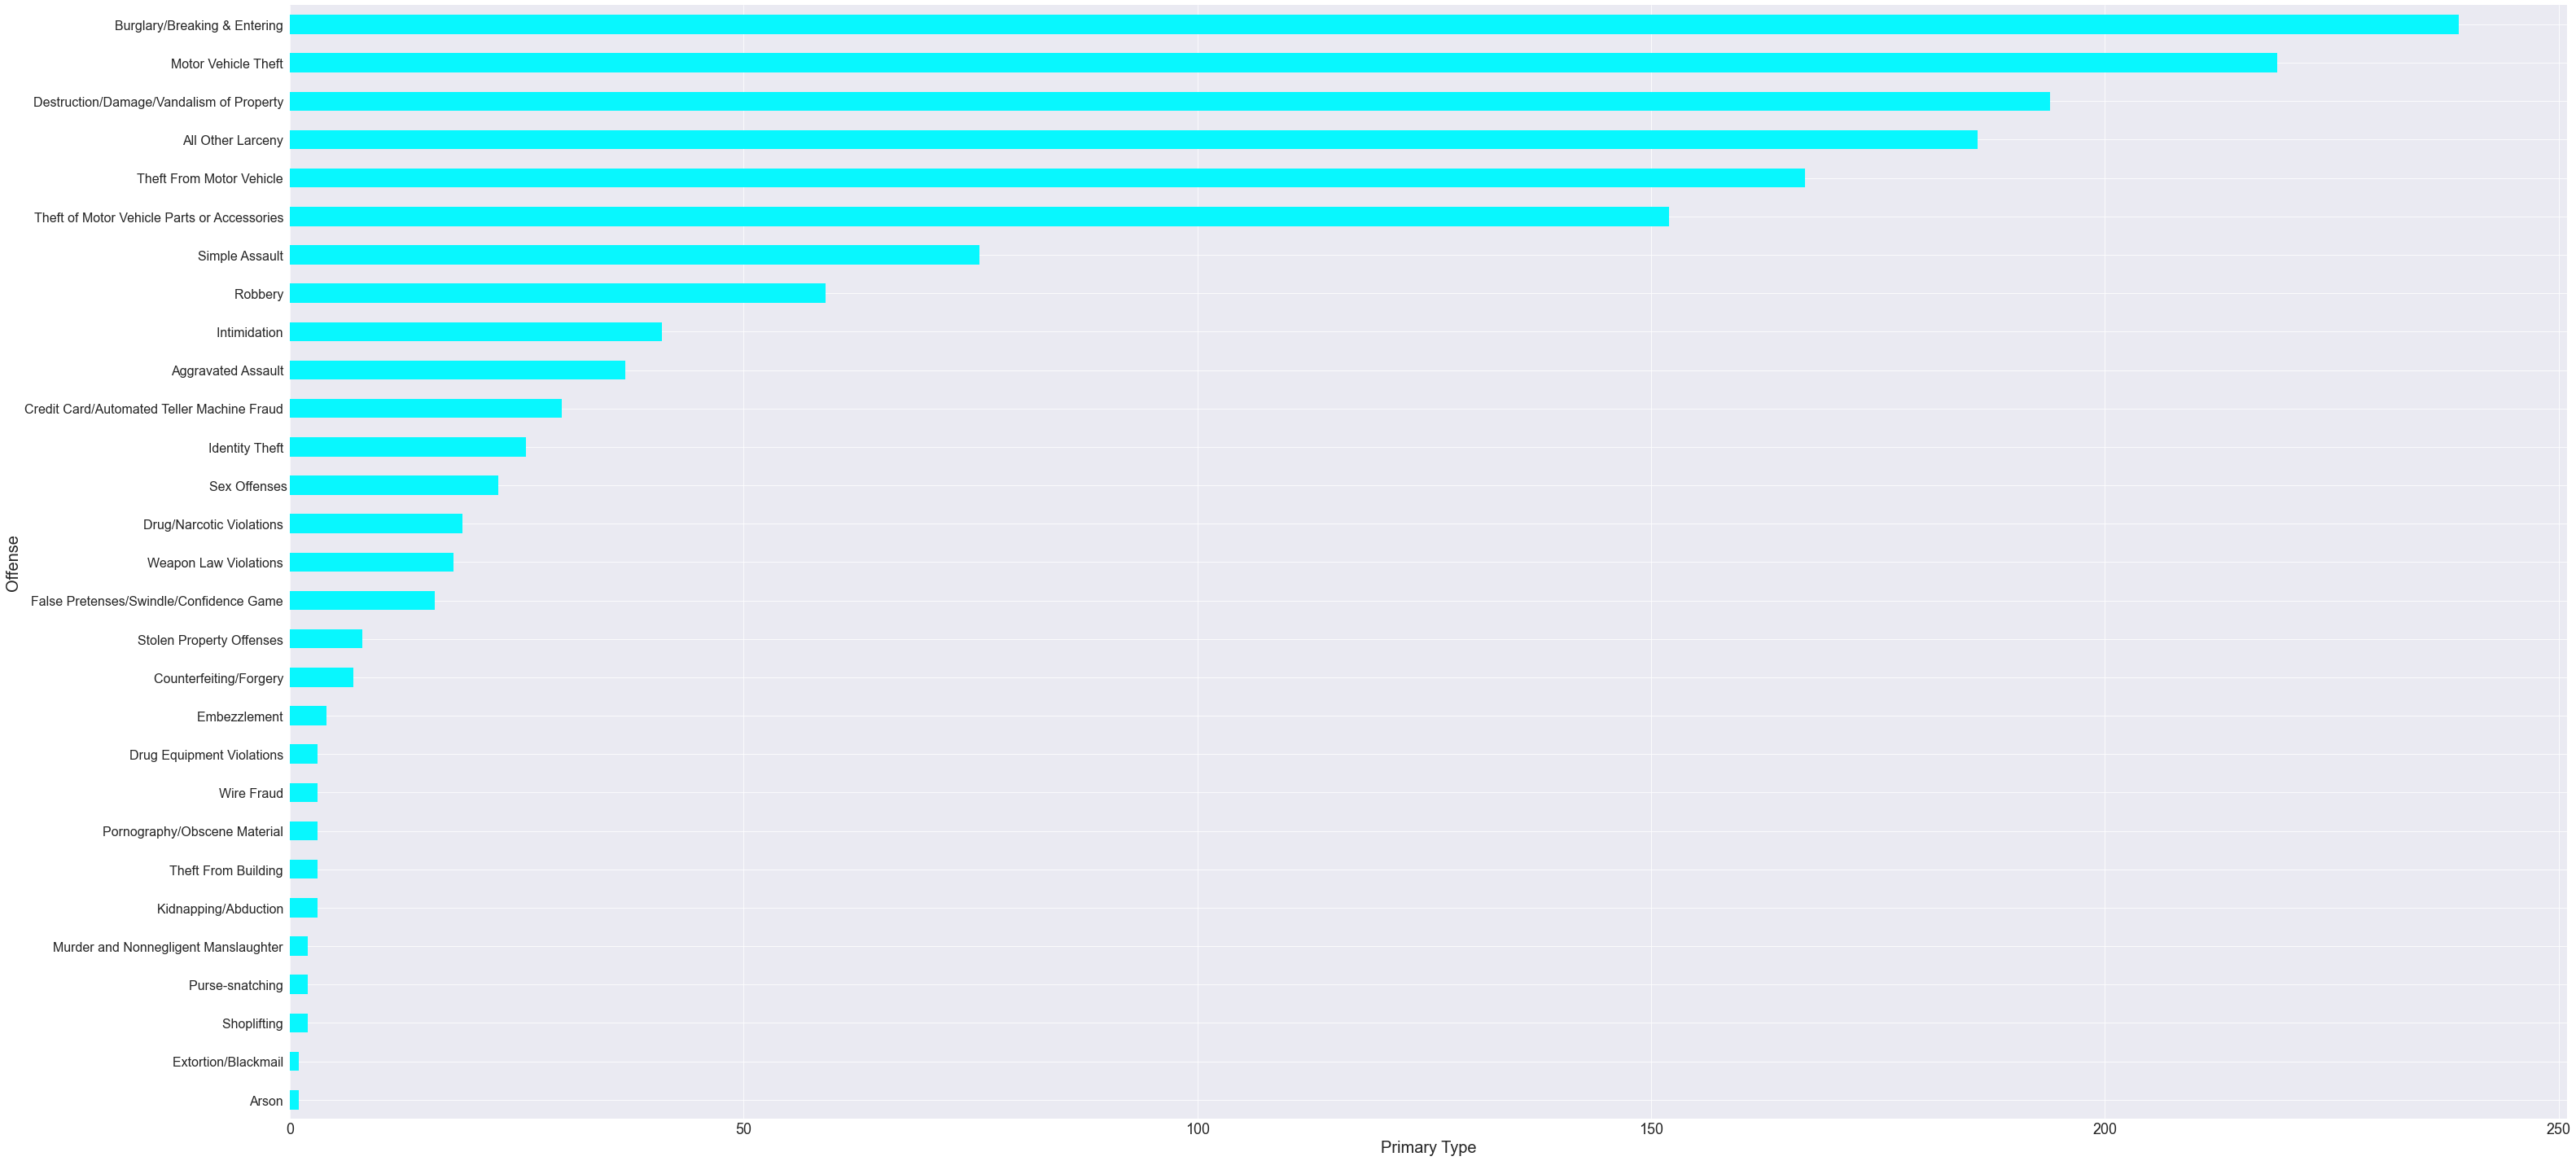

In [ ]:
plt.figure(figsize=(40,20))
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Primary Type', fontsize=20)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.style.use('cyberpunk')
mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
crimeType = filtered_df.groupby([filtered_df['Offense']]).size().sort_values(ascending=True).plot(kind='barh', style='cyberpunk')
plt.savefig('crime_by_type.png')
